# wordcloud +jieba 生成中文词云图

D:\xuhui\program64\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


阳光先生 和 叶子小姐 欣宝 最美 叶子小姐 最 美丽 全 幼儿园 最 可爱 爱 你 一路 思念 浸满 每 一步 明眸 频顾 令 我 喜悦 无数 细数 流 年 甜蜜 因 你 故 牵手 永远 此生 相伴 度 爱 你 是 我 命中 归宿 在 我 的 人生 中 最大 的 幸运 就是 遇见 了 你 叶子小姐 一直 要 快乐 着 深圳 天气 高温 小懵圈 睡觉 小程序 欣 宝宝 晚安 安 Hsuhui Chan 小程序 早睡早起 Hsuhui Chan 小程序 今天 也 起 早 了 小懵圈 这 也 太 早 了 Hsuhui Chan 小程序 安安 小懵圈 不 正常 小懵圈 我先 休息 两天 小懵圈 看看 咋 回事 Hsuhui Chan 小程序 我 八点 七 11 点 睡觉 Hsuhui Chan 小程序 欣宝 6 点起 10 点 睡 Hsuhui Chan 小程序 很 正常 Hsuhui Chan 小程序 欣 宝宝 晚安 啦 小懵圈 爸爸 爱 你 Hsuhui Chan 小程序 有欣宝 在 安心 小懵圈 慢慢 调整 不许 太 不 开心 知道 吗 小懵圈 可以 讲 给 我 听 Hsuhui Chan 小程序 真 没事儿 小懵圈 嗯 嗯 小懵圈 以后 有事 了 要 跟 我 说 小懵圈 Hsuhui Chan 小程序 嗯 呢 小懵圈 哈哈哈 小懵圈 老 陈 小懵圈 我 不行 了 小懵圈 真棒 Hsuhui Chan 小程序 卖 丑 小懵圈 在 我 面前 小懵圈 哈哈哈 小懵圈 没事 Hsuhui Chan 小程序 小懵圈 也 就 嘲笑 你 两次 小懵圈 Hsuhui Chan 小程序 哈哈哈 Hsuhui Chan 小程序 没事儿 Hsuhui Chan 小程序 打是亲 嘲笑 是 更 亲 小懵圈 小懵圈 谁 给 你 的 自信 小懵圈 哈哈哈 可以 的 小懵圈 菊花 性凉 我 不能 喝 小懵圈 而且 最近 在 吃 中药 Hsuhui Chan 小程序 会 比 白开水 有 味道 一些 小懵圈 所以 我 喝 开水 就 好 啦 Hsuhui Chan 小程序 嗯 嗯 欣宝 在 吃 中药 的话 小懵圈 怕 吃 别的 跟 药 相冲 Hsuhui Chan 小程序 就 不吃 其他 药 啦 Hsuhui Chan 小程序 对 小懵圈 嗯 嗯 小懵圈 陈老师 小懵圈 这 两天 看 你 不 太 开心

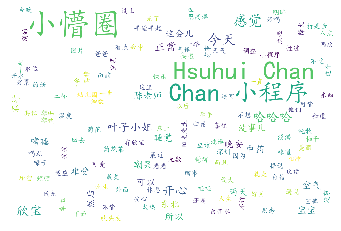

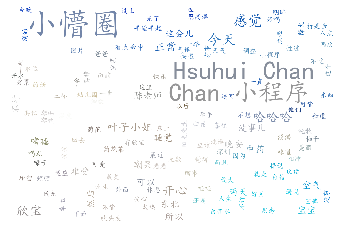

In [45]:
#-*- coding:utf-8 -*-
import jieba
from scipy.misc import imread #这是一个图像处理的函数
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt
import re


back_picture = imread('D:/code_project/data/wordcloudData/xila_scenery.jpg') #解析该图片为python对象

wc = WordCloud(background_color='white', #背景颜色
               max_words=1000, #最大词数
               mask=back_picture, #以改参数值作图绘制云，这个参数不为空时，width 和height会被忽略
               max_font_size=100, #显示字体的最大值
               stopwords=STOPWORDS.add(u'妖艳'), #使用内置的屏蔽词，再添加’妖艳‘
               random_state=42, #为没歌词返回一个PIL颜色
               font_path='C:/Windows/Fonts/simkai.ttf', #解决了显示图片时出现口字型乱码的问题
               #可进入C:\Windows\Fonts\路径更换字体
               width=1000, #图片的宽
               height=800 #图片的长
              )

#添加自己的词库分词，添加之后jieba分词不会拆分这个词
jieba.add_word(u'阳光先生')
jieba.add_word(u'叶子小姐')
jieba.add_word(u'小懵圈')
jieba.add_word(u'小程序')
#打开词源的文本文件
text = open('D:/code_project/data/wordcloudData/sourceWords.txt').read()
text = re.compile(r'[^\d\w]+').sub(' ',text)

#该函数的作用就是把屏蔽词去掉，使用这个函数就不用再WordCloud参数中添加stopwords参数了。把你需要屏蔽的词全部放入这个stopwords.txt文件即可
def stop_words(texts):
    words_list = []
    word_generator = jieba.cut(texts, cut_all=False) #返回一个迭代器
    with open('D:/code_project/data/wordcloudData/stopwords.txt') as f:
        stop_text = f.read()
        unicode_stop_text = stop_text #保留str格式
        f.close()
    for word in word_generator:
        word_ = word.strip()
        if word_ not in unicode_stop_text:       
            words_list.append(word)
    return ' '.join(words_list) #注意有空格

text = stop_words(text)
print(text)
wc.generate(text)

#基于彩色图像生成相应的彩色
image_colors = ImageColorGenerator(back_picture)

#显示图片
plt.figure(1)
plt.imshow(wc)

#关闭坐标轴
plt.axis('off')

#绘制词云
plt.figure(2)
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis('off')

#保存图片
wc.to_file('D:\code_project\data\wordcloudData\generation_picture.png')

In [46]:
pwd

'C:\\Users\\HsuhuiChan\\mypython\\NLP_course'